# Midterm Code: Cleaned and Expanded
*By M. Nolan Gray*

*11/9/2021 Update: I removed all unnecessary code and markdown bubbles, which largely included checks. I added OPD districts to my vehicular homelessness heat map and added a function and loop that would produce minimaps of each of the OPDs.*

## Patterns of Housing Affordability

In this section, I will conduct a preliminary housing profile of Los Angeles using US Census Data, specifically median gross rent and median home values.

First, I need to import the libraries I will likely use.

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Next I will need to import my data.

In [3]:
mgr = gpd.read_file('Data/acs2019_5yr_B25064_14000US06037293306_MGR.geojson')
mv = gpd.read_file('Data/acs2019_5yr_B25077_14000US06037293306_MV.geojson')

Census Reporter hid citywide medians at the end. Let's fix that.

In [4]:
mgr = mgr.drop([1004])
mv = mv.drop([1004])

Let's remove the unnecessary error columns...

In [5]:
ctk_mgr = ['geoid','name','B25064001','geometry']
mgr = mgr[ctk_mgr]
ctk_mv = ['geoid','name','B25077001','geometry']
mv = mv[ctk_mv]

...and name them something more intuitive.

In [6]:
mgr.columns = ['geoid','name','Median Gross Rent','geometry']
mv.columns = ['geoid','name','Median Value','geometry']

### Median Gross Rent
To start our analysis of median gross rents, let's get some descriptive statistics.

In [7]:
mgr['Median Gross Rent'].describe()

count     986.000000
mean     1589.549696
std       548.012976
min       292.000000
25%      1206.250000
50%      1407.500000
75%      1838.750000
max      3501.000000
Name: Median Gross Rent, dtype: float64

Alright, so this tells us a few things: the average median gross rent in a Los Angeles census tract is \\$1,589. The minimum is \\$292. The maximum is \\$3,501. Ouch! Let's plot it.

<AxesSubplot:ylabel='Frequency'>

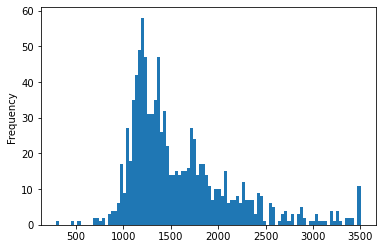

In [8]:
mgr['Median Gross Rent'].plot.hist(bins=100)

Interesting, so it's a right-skewed distribution, with a few *very* high-rent tracts.

Just out of morbid curiosity, I wonder what percentage of Angelenos pay roughly the same rent as me. Let's try a pie chart.

To find out, I first need to figure out (a) how many tracts have a higher median gross rent than my approximate rent, (b) how many tracts have a lower median gross rent than my approximate rent, and (c) how many tracts have a median gross rent roughly the same as my rent.

I pay \\$1,600: to provide some buffer, anything over \\$1,700 will qualify as more, and anything under \\$1,500 will qualify as less.

In [9]:
rent_list = mgr['Median Gross Rent'].tolist()
print(rent_list) #Checking to make sure I did this right!

[1737.0, 2198.0, 1423.0, 1197.0, 2371.0, 1335.0, 2216.0, 2547.0, 1590.0, 1259.0, 2375.0, 1406.0, 1218.0, 2438.0, 1695.0, 2019.0, 981.0, 1434.0, 1221.0, 1602.0, 1338.0, 1347.0, 2426.0, 1116.0, 1565.0, 1629.0, 1391.0, 1464.0, 1427.0, 1862.0, 1267.0, 1372.0, 1478.0, 1692.0, 1485.0, 1655.0, 2079.0, 1879.0, 2439.0, 1990.0, 2157.0, 1422.0, 2006.0, 1383.0, 1794.0, 1556.0, 1466.0, 2051.0, 1810.0, 3501.0, 1436.0, 2860.0, nan, 2361.0, 2898.0, 2229.0, 1233.0, 1698.0, 1623.0, 1820.0, 3118.0, 2977.0, 3501.0, 3253.0, 3415.0, 1888.0, 1229.0, 2240.0, 2597.0, 1742.0, 1548.0, 2868.0, 1463.0, 1190.0, 2404.0, 2178.0, 2093.0, 2291.0, 1775.0, 3183.0, 2271.0, 3501.0, 1585.0, 1711.0, 1482.0, 3025.0, 3501.0, 2101.0, 2167.0, 1657.0, 2375.0, 2870.0, 1373.0, 1378.0, 2153.0, 1911.0, 2423.0, nan, 1648.0, 2049.0, 1657.0, 1696.0, 1629.0, nan, 1720.0, 1647.0, 1626.0, 1679.0, 1874.0, 1460.0, 1364.0, 1323.0, 1444.0, 1523.0, 1762.0, 1232.0, nan, 2871.0, 1713.0, 1806.0, 2280.0, 1370.0, 1212.0, 1213.0, 1433.0, 1309.0, 1315

In [10]:
more_than_me = 0
for entry in rent_list:
    if entry > 1700:
        more_than_me = more_than_me + 1
    else:
        pass

print(more_than_me)

331


In [11]:
less_than_me = 0
for entry in rent_list:
    if entry < 1500:
        less_than_me = less_than_me + 1
    else:
        pass

print(less_than_me)

561


In [12]:
same_as_me = 0
for entry in rent_list:
    if (entry > 1499) and (entry < 1701):
        same_as_me = same_as_me + 1
    else:
        pass

print(same_as_me)

94


We now know that: (a) 331 tracts have a median rent well above what I pay, (b) 561 tracts are below, and (c) 94 tracts pay roughly what I pay. 

As a check, I added them up, and they total 986, which is exactly the number of fields that have median gross rent data. Phew!

Alright, now let's make that pie chart and visualize that data.

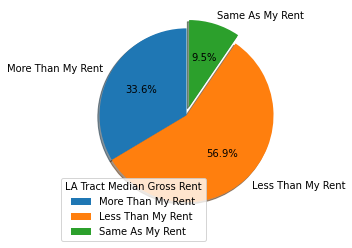

In [13]:
labels = ['More Than My Rent','Less Than My Rent','Same As My Rent']
sizes = [more_than_me,less_than_me,same_as_me]
explode = (0,0,0.1) # I want my chunk to stick out

fig1, rent = plt.subplots()
rent.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
rent.legend(loc = 'lower left',bbox_to_anchor = (-0.1,-0.1),title = "LA Tract Median Gross Rent") # I needed to get the legend out of the way of the dang chart!

plt.show()

Wow, maybe I should negotiate with my landlord. Or move...

Let's make a choropleth map of median gross rents. 

In [14]:
mgr_wm = mgr.to_crs(epsg=3857)

I first needed to reproject the data.

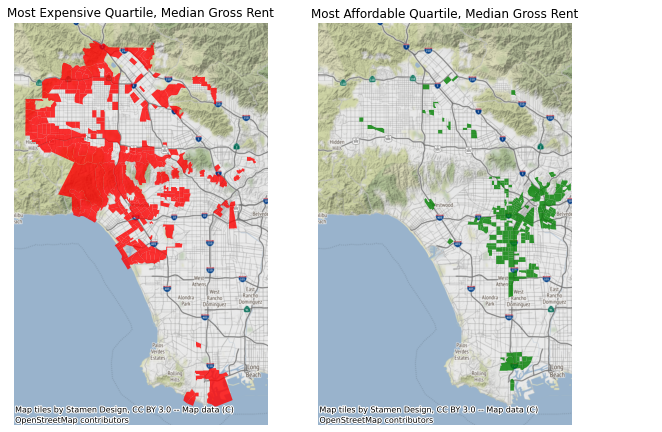

In [15]:
fix, axs = plt.subplots(1,2,sharex = True,sharey = True, figsize=(10,10))
ax1, ax2 = axs
mgr_wm[mgr_wm['Median Gross Rent']>1838].plot(ax=ax1,alpha=0.8,color="red")
ax1.axis('off')
ax1.set_title("Most Expensive Quartile, Median Gross Rent")
ctx.add_basemap(ax1)

mgr_wm[mgr_wm['Median Gross Rent']<1206].plot(ax=ax2,alpha=0.8,color="green")
ax2.axis('off')
ax2.set_title("Most Affordable Quartile, Median Gross Rent")
ctx.add_basemap(ax2)

Again, there are some pretty striking trends here: West Los Angeles and outer portions of the Valley are the most expensive, South Los Angeles and neighborhoods surrounding downtown are the most affordable.

### Median Home Values

Alrighty, let's turn to median home values. Let's start with some descriptive statistics.

In [16]:
mv['Median Value'].describe().apply(lambda x: format(x, 'f')) 
#Jupyter kept presenting the data in scientific notation -- hence the extra code!

count        929.000000
mean      690762.672766
std       363769.125843
min       247900.000000
25%       450700.000000
50%       584300.000000
75%       801800.000000
max      2000001.000000
Name: Median Value, dtype: object

What does this tell us? The average median home value for a tract in Los Angeles is \\$690,763. The most expensive tract has a median home value of \\$2,000,001 and the most affordable tract has a median home value of \\$247,900. Maybe there's hope for me staying in Los Angeles yet... 

Let's do a histogram of median home values by tract.

<AxesSubplot:ylabel='Frequency'>

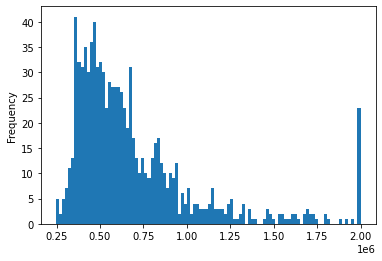

In [17]:
mv['Median Value'].plot.hist(bins=100)

Wow, a similar pattern pattern: a right skew with an extreme outlier. Notably, there isn't nearly as much of a left tail as with median gross rents.

Let's map it the extremes of median cross rent.

In [18]:
mv_wm = mv.to_crs(epsg=3857)

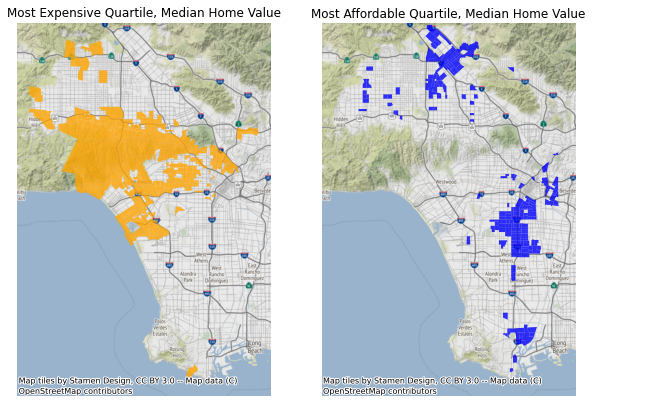

In [19]:
fix, axs = plt.subplots(1,2,sharex = True, sharey=True,figsize=(10,10))
ax1, ax2 = axs
mv_wm[mv_wm['Median Value']>801800].plot(ax=ax1,alpha=0.8,color="orange")
ax1.axis('off')
ax1.set_title("Most Expensive Quartile, Median Home Value")
ctx.add_basemap(ax1)

mv_wm[mv_wm['Median Value']<450700].plot(ax=ax2,alpha=0.8,color="blue")
ax2.axis('off')
ax2.set_title("Most Affordable Quartile, Median Home Value")
ctx.add_basemap(ax2)

At first blush, there are some striking differences from median gross rents: median home values are quite a bit higher west of downtown, and quite a bit lower up in the northern Valley, up around Sylmar.

### Conclusion

This exercise illustrates the geographic variation in median gross rents and median home values. Rents and home values broadly behave the same in Los Angeles, but with many conspicious exceptions. 

Further research is needed to understand how these variables interact, if at all, with vehicular homelessness and/or the adoption of parking districts.

## Patterns of Vehicular Homelessness

In this section, I will connect homeless count data to Census tracts and map them to get a better sense for the geography of vehicular homelessness in Los Angeles.

First, I import the data.

In [20]:
hd = gpd.read_file('Data/2020-homeless-count-data-by-census-tract.csv')
ct = gpd.read_file('Data/Census Tracts 2010.geojson')

Alright, so essentially what I have to do is merge these based on their shared attribute field, which seems to be 'tract' and 'ct10'.

In [21]:
ct = ct.rename(columns={'ct10':'tract'})

In [22]:
hdct = hd.merge(ct,on='tract')

Alright, let's remove some of the columns.

In [23]:
ctk_hdct = ['tract','LACity','totCarPeople','totVanPeople','totCamperPeople','geometry_y']
hdct = hdct[ctk_hdct]

And rename them.

In [24]:
hdct.columns = ['tract','LA','cars','vans','campers','geometry']

Let's go ahead and add the total vehicular homeless count and put that in a new column. But first, let's change them from objects to floats.

In [25]:
hdct['cars'] = hdct['cars'].astype(float)
hdct['vans'] = hdct['vans'].astype(float)
hdct['campers'] = hdct['campers'].astype(float)

In [26]:
hdct['total']= hdct['cars']+hdct['vans']+hdct['campers']

Alright, and we really only need LA tracts, demarcated by the 'LA' field. Let's remove the rest.

In [27]:
hdctla = hdct.loc[hdct['LA']=='1']

### Descriptive Statistics

Checking the original CSV, this did the trick. Let's do some data analysis!

In [28]:
hdctla['cars'].describe()

count    1004.000000
mean        2.226255
std         4.555851
min         0.000000
25%         0.000000
50%         0.000000
75%         2.997000
max        57.461000
Name: cars, dtype: float64

In [29]:
hdctla['vans'].describe()

count    1004.000000
mean        3.185460
std         6.382317
min         0.000000
25%         0.000000
50%         0.000000
75%         3.705000
max        94.466000
Name: vans, dtype: float64

In [30]:
hdctla['campers'].describe()

count    1004.000000
mean        4.884599
std         8.740953
min         0.000000
25%         0.000000
50%         1.650000
75%         5.967000
max        87.789000
Name: campers, dtype: float64

In [31]:
hdctla['total'].describe()

count    1004.000000
mean       10.296314
std        15.512077
min         0.000000
25%         1.512000
50%         4.969000
75%        12.906250
max       155.435000
Name: total, dtype: float64

Alright, so some topline takeaways: It would seem like campers are the most common form of vehicle dwelling. I wonder how much this is simply a matter of cars being hard to identify when they are used as housing?

Let's chart how vehicular homelessness breaks out.

In [32]:
vh_total = hdctla['total'].sum()
print('Total vehicular homelessness: ' + str(vh_total))
car_total = hdctla['cars'].sum()
car_per = ((car_total/vh_total)*100)
print('Car vehicular homelessness: ' + str(car_total))
print('Car vehicular homelessness percent: ' + str(car_per))
van_total = hdctla['vans'].sum()
van_per = ((van_total/vh_total)*100)
print('Van vehicular homelessness: ' + str(van_total))
print('Van vehicular homelessness percent: ' + str(van_per))
camper_total = hdctla['campers'].sum()
camper_per = ((camper_total/vh_total)*100)
print('Camper vehicular homelessness: ' + str(camper_total))
print('Camper vehicular homelessness percent: ' + str(camper_per))


Total vehicular homelessness: 10337.499
Car vehicular homelessness: 2235.16
Car vehicular homelessness percent: 21.62186424395301
Van vehicular homelessness: 3198.202
Van vehicular homelessness percent: 30.937869981897947
Camper vehicular homelessness: 4904.137000000001
Camper vehicular homelessness percent: 47.440265774149054


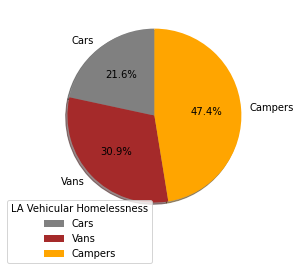

In [33]:
labels = ['Cars','Vans','Campers']
sizes = [car_total,van_total,camper_total]
explode = (0,0,0.1) # I want my chunk to stick out

fig1, rent = plt.subplots()
rent.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['gray','brown','orange'])
rent.legend(loc = 'lower left',bbox_to_anchor = (-0.2,-0.2),title = "LA Vehicular Homelessness") # I needed to get the legend out of the way of the dang chart!

plt.show()

### Mapping

Now let's take a first stab at mapping the data.

In [34]:
from geopandas import GeoDataFrame
hdctla = GeoDataFrame(hdctla)
type(hdctla)

geopandas.geodataframe.GeoDataFrame

Let's make a heatmap in Kepler. As I understand, I will first need to convert the polygons into centroids and break up the 'latitude' and 'longitude' fields. Let's do that now.

In [35]:
hdctla_points = hdctla.copy()
hdctla_points['geometry'] = hdctla_points['geometry'].centroid
print(hdctla_points.head())

    tract LA   cars   vans  campers                     geometry   total
0  101110  1  0.000  0.000    0.000  POINT (-118.29299 34.25947)   0.000
1  101122  1  1.607  3.705    0.000  POINT (-118.29015 34.26772)   5.312
2  101210  1  1.607  7.410    3.978  POINT (-118.29073 34.25297)  12.995
3  101220  1  0.000  0.000   15.912  POINT (-118.28163 34.25161)  15.912
4  101300  1  0.000  0.000    1.989  POINT (-118.27100 34.24878)   1.989


/tmp/ipykernel_56/2206283221.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hdctla_points['geometry'] = hdctla_points['geometry'].centroid


In [36]:
hdctla_points['lon'] = hdctla_points['geometry'].x
hdctla_points['lat'] = hdctla_points['geometry'].y
hdctla_points.head()

tract LA   cars   vans  campers                     geometry   total  \
0  101110  1  0.000  0.000    0.000  POINT (-118.29299 34.25947)   0.000   
1  101122  1  1.607  3.705    0.000  POINT (-118.29015 34.26772)   5.312   
2  101210  1  1.607  7.410    3.978  POINT (-118.29073 34.25297)  12.995   
3  101220  1  0.000  0.000   15.912  POINT (-118.28163 34.25161)  15.912   
4  101300  1  0.000  0.000    1.989  POINT (-118.27100 34.24878)   1.989   

          lon        lat  
0 -118.292987  34.259474  
1 -118.290147  34.267722  
2 -118.290731  34.252972  
3 -118.281632  34.251608  
4 -118.270999  34.248778

In [37]:
hdctla_points_wm = hdctla_points.to_crs(epsg=3857)

In [38]:
from keplergl import KeplerGl

In [39]:
map = KeplerGl(height=600,width=800)
map.add_data(data=hdctla_points_wm,name="Vehicular Homelessness in LA")
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Vehicular Homelessness in LA': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

In [40]:
#map.save_to_html(file_name='la_total_TEST.html')

(Results with Kepler settings modified live [here](https://rawcdn.githack.com/mnolangray/up206-nolan-group/d443cc9b7150f167a9af1bf07c232dd19dd13e36/group_assignments/la_total.html).)

Looks good! I don't know why it's still displaying points in the Jupyter Notebook, but in the HTML version, it's all good to go. I'll be presenting this in class. (Low key very excited at how cool this looks.)

So now, for some analysis: vehicular homelessness is broadly clustered in and around Downtown, industrial North Hollywood, Venice, and South Los Angeles. There are some very conspicuous trends by type of vehicle:
* Car-based homelessness is most pronounced in and around Downtown, namely Filipinotown, Echo Park, and Skid Row.
* Van-based homelessness is heavily concentrated in Venice.
* Camper-based homelessness is heavily concentrated in industrial areas of North Hollywood and South Los Angeles.

### Conclusion

Campers/RVs comprise over half of all vehicular homelessness. The nature of vehicular homeless determines where it occurs. 

Further research will help to clarify how these patterns interact with parking district adoption, if at all.

## Parking Districts

Over the past decade, many neighborhoods have adopted  parking districts as a way to ensure stricter enforcement against vehicular homelessness. Part of my research interest is to better understand the use of parking policy toward exclusionary ends.

As a preliminary study, I will here map the major parking districts.

In [41]:
opd = gpd.read_file('Data/LADOT Overnight Parking Districts.geojson')
ppd = gpd.read_file('Data/LADOT Preferential Parking Districts (PPD).geojson')

Let's reproject and map them.

In [42]:
opd_wm = opd.to_crs(epsg=3857)
ppd_wm = ppd.to_crs(epsg=3857)

(-13197219.543183511,
 -13155224.587692978,
 4019367.4110902213,
 4066209.951564023)

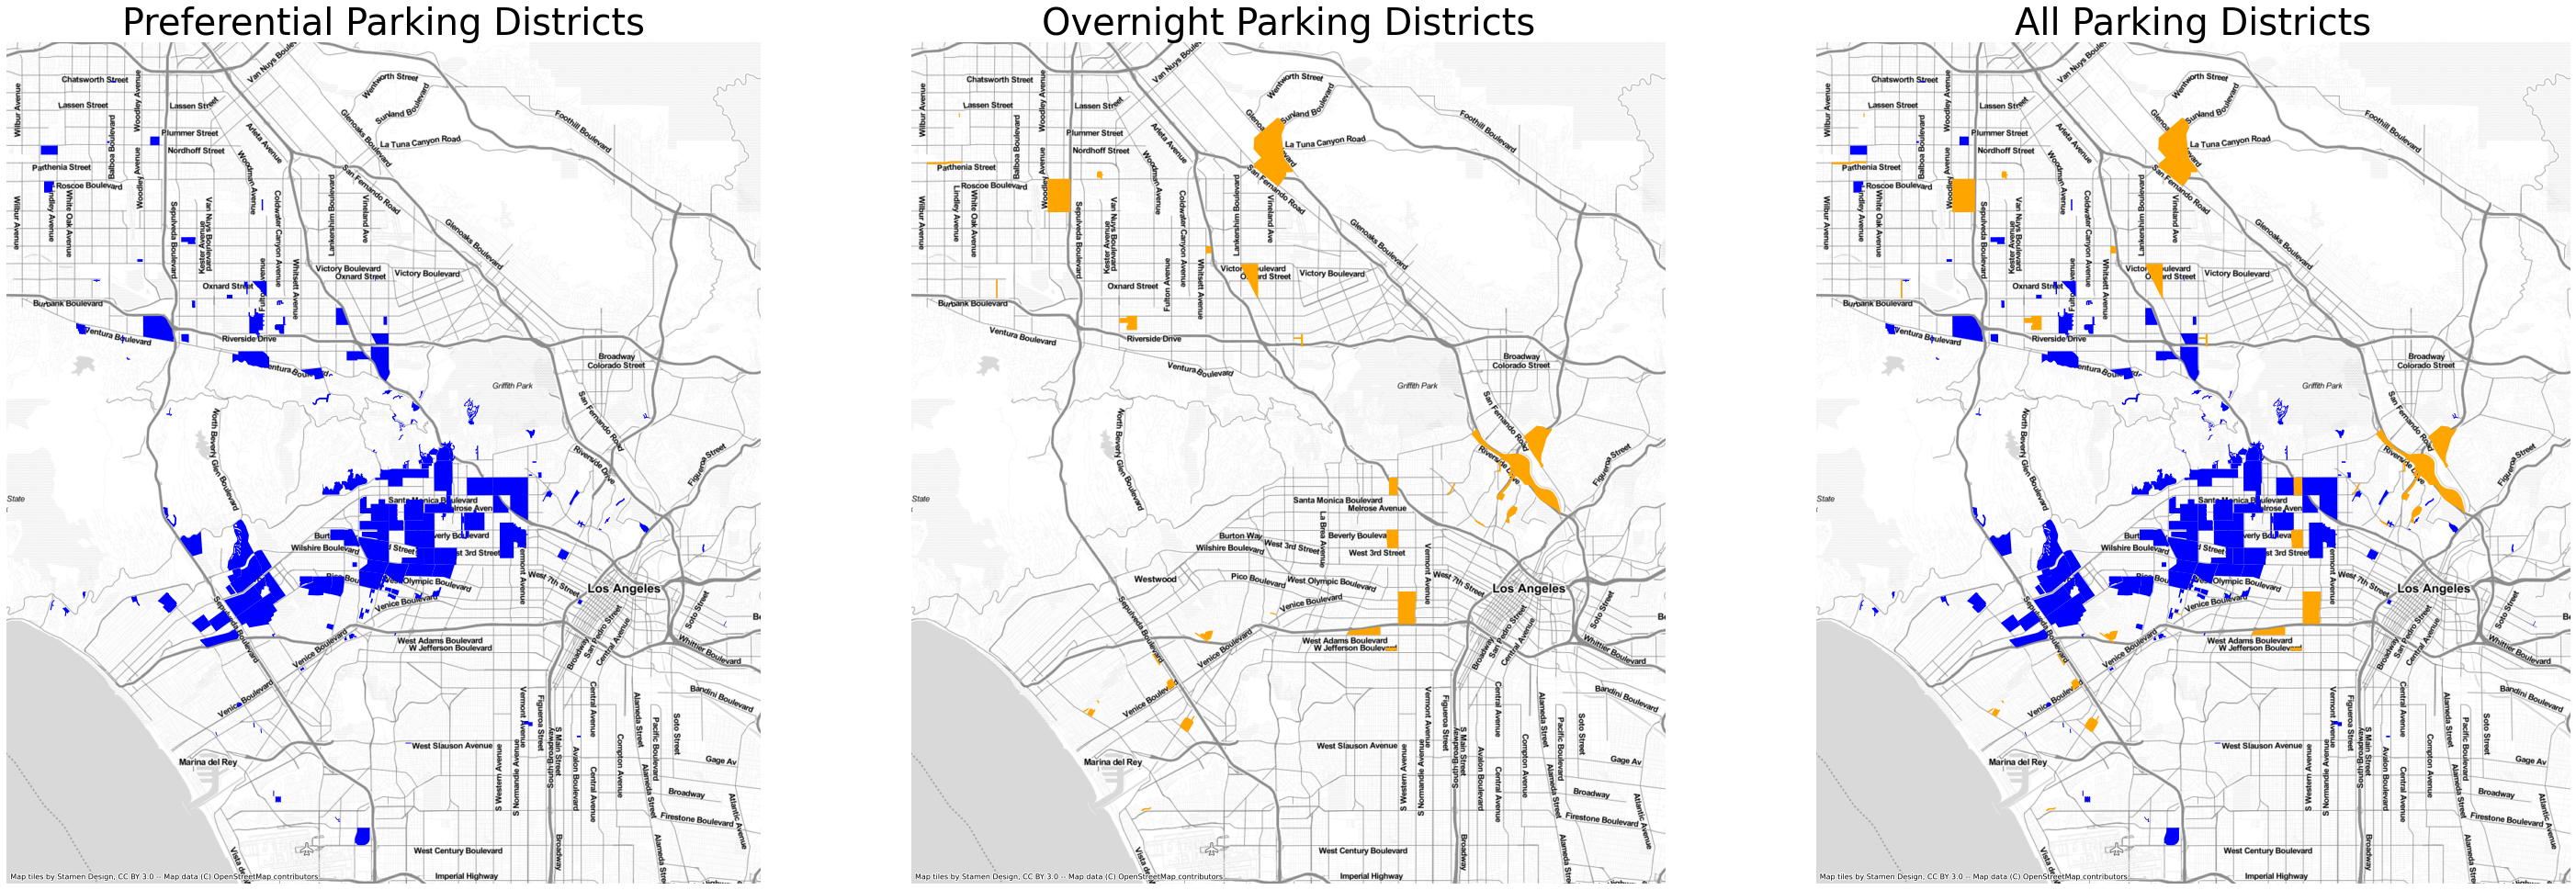

In [43]:
fix, axs = plt.subplots(1,3,sharex= True,sharey = True,figsize =(50,30))
ax1, ax2, ax3 = axs

ppd_wm.plot(ax=ax1,color='blue')
ax1.set_title('Preferential Parking Districts',fontsize=40)
ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerLite)
ax1.axis("off")

opd_wm.plot(ax=ax2,color='orange')
ax2.set_title('Overnight Parking Districts',fontsize=40)
ctx.add_basemap(ax2, source=ctx.providers.Stamen.TonerLite)
ax2.axis("off")

ppd_wm.plot(ax=ax3,color='blue')
opd_wm.plot(ax=ax3,color='orange')
ax3.set_title('All Parking Districts',fontsize=40)
ctx.add_basemap(ax3, source=ctx.providers.Stamen.TonerLite)
ax3.axis("off")

This is pretty interesting. So it seems like:
* Preferential Parking Districts are going in affluent residential areas, which doesn't really suggest a relationship to vehicular homelessness either way.
* Overnight Parking Districts *do* seem to be near the vehicular homelessness hotspots that we identified, namely the North Hollywood industrial areas and those neighborhoods west of downtown. 

This may confirm my research partner's suspicion that OPDs are being used to contain the encroachment of vehicular homelessness. Are we seeing the rise of exclusionary parking policy here in Los Angeles? Where *else* would it have emerged?

---*11/9/2021 Addition*---

I'd like to go ahead and add OPDs to that heatmap.

In [44]:
map = KeplerGl(height=600,width=800)
map.add_data(data=opd_wm,name="Overnight Parking Districts")
map.add_data(data=hdctla_points_wm,name="Vehicular Homelessness in LA")
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Overnight Parking Districts': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

Looking good! Find the spruced up output [here](https://rawcdn.githack.com/mnolangray/up206-nolan-group/f0b1ef5cde879e17059dff7ba2523bf43ddfb27b/group_assignments/output/LAVH_OPDs.html).

In [45]:
#map.save_to_html(file_name='output/LAVH_OPDs.html')

## Loops

---*11/9/2021 addition*---

Let's use loops to make little maps of all 40 OPDs. 

I was having issues with an earlier iteration with this code. Googling the error message (an advanced coding technique) suggested that the problem may be that the geometries for the OPDs were multipolygons. So I found some code online to "explode" the multipolygons and turn them into polygons.

In [48]:
def explode(indata):
    indf = gpd.GeoDataFrame.from_file(indata)
    outdf = gpd.GeoDataFrame(columns=indf.columns)
    for idx, row in indf.iterrows():
        if type(row.geometry) == Polygon:
            outdf = outdf.append(row,ignore_index=True)
        if type(row.geometry) == MultiPolygon:
            multdf = gpd.GeoDataFrame(columns=indf.columns)
            recs = len(row.geometry)
            multdf = multdf.append([row]*recs,ignore_index=True)
            for geom in range(recs):
                multdf.loc[geom,'geometry'] = row.geometry[geom]
            outdf = outdf.append(multdf,ignore_index=True)
    return outdf

In [49]:
opd_exploded = opd_wm.explode()

The geometry is now properly exploded. Time to create a list of OPD numbers that my loop will eventually iterate over.

In [62]:
number_list = opd_exploded.opdnum.unique().tolist()
print(name_list)

['500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '512', '513', '514', '515', '516', '517', '518', '519', '524', '525', '527', '531', '536', '538', '537', '541', '543', '545', '546', '550', '551', '544', '528', '530', '532', '533', '534', '535', '547']


Looks good. All 40 OPDs are there. Now let's define the function that will make the maps.

In [76]:
def map_opd1(name):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax=ax
    opd_exploded[opd_exploded['opdnum']==name].plot(ax=ax,alpha=0.5,color="orange")
    ax.axis('off')
    ax.set_title("OPD " + name)
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

Let's test it out.

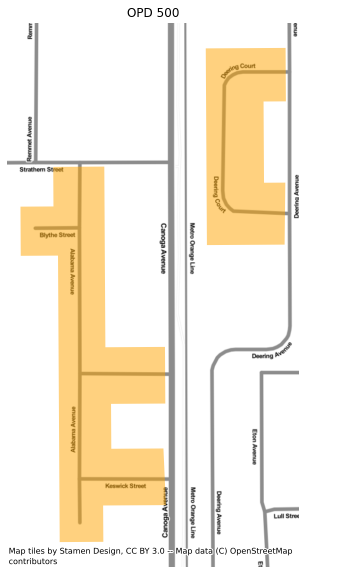

In [77]:
map_opd1('500')

Ugh, you have no idea how long it took me to get that to work. 

And now, for the loop.

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
/tmp/ipykernel_56/1263217303.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much me

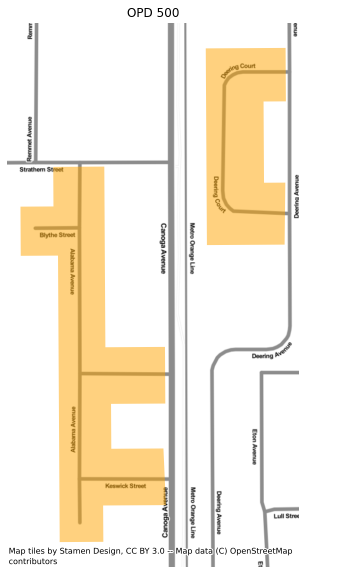

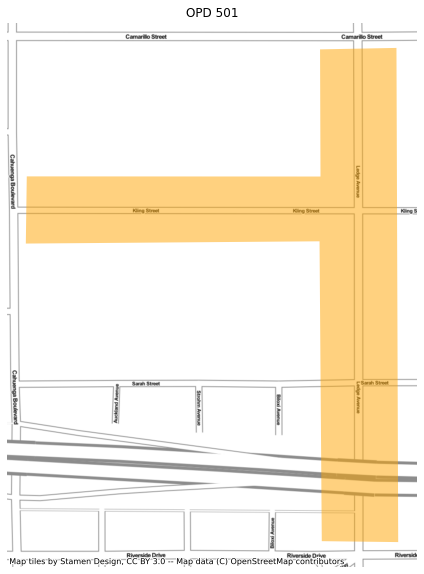

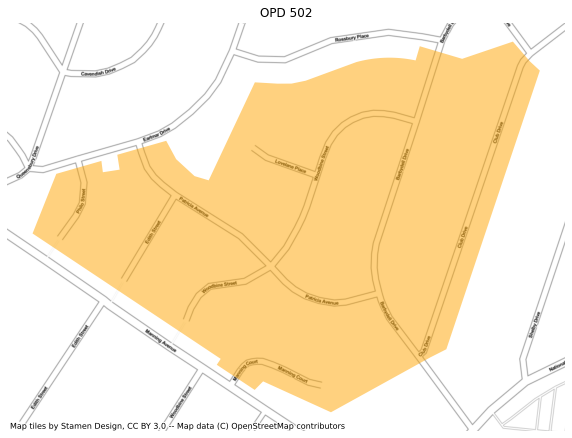

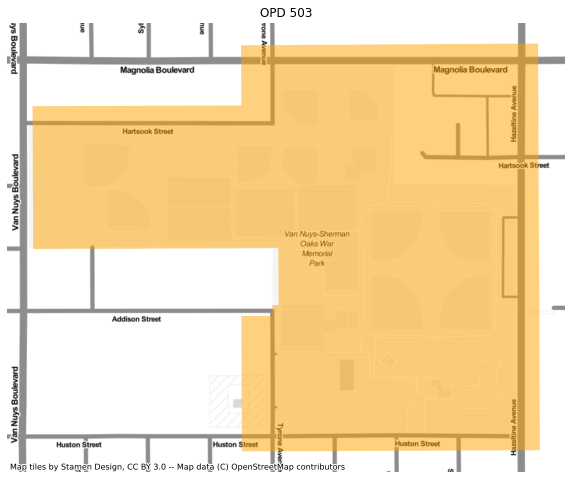

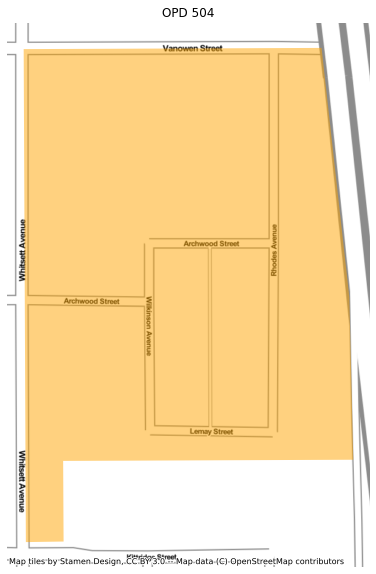

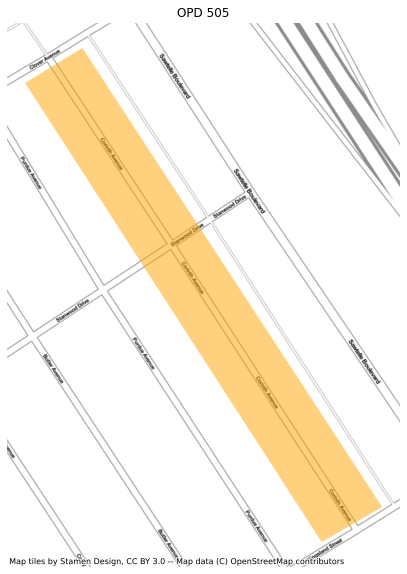

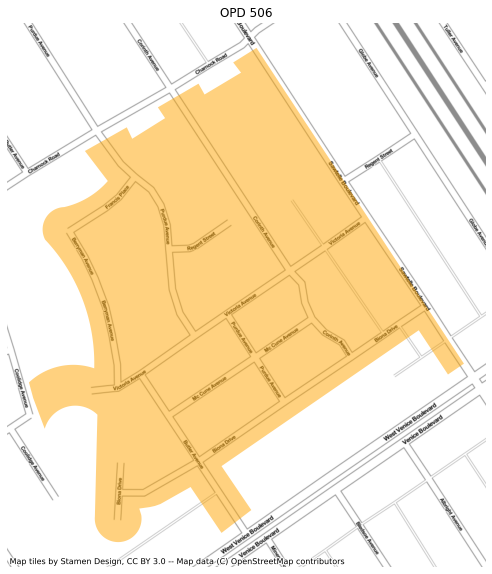

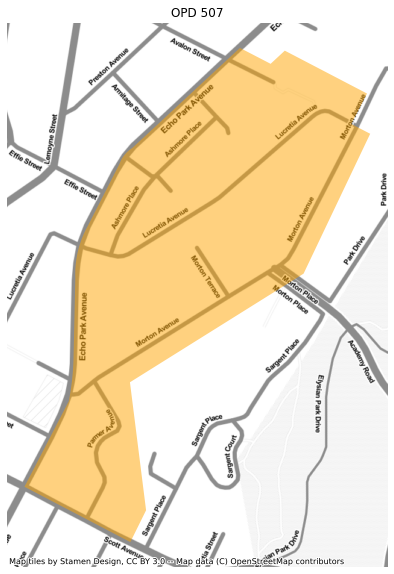

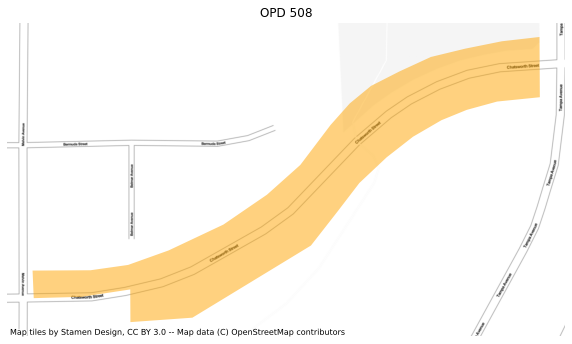

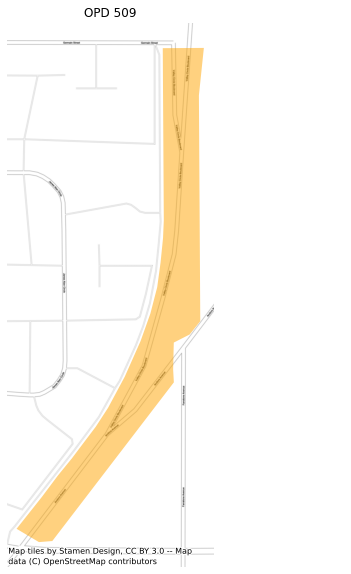

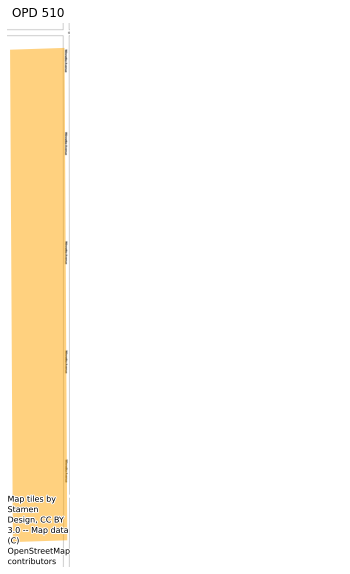

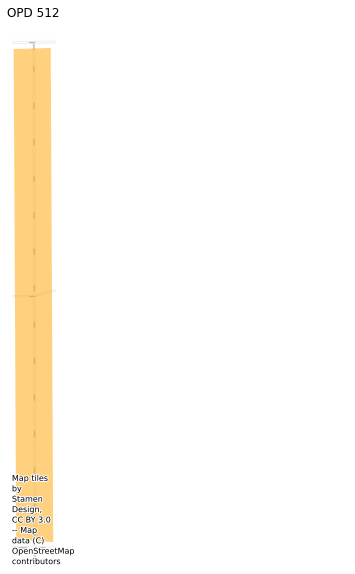

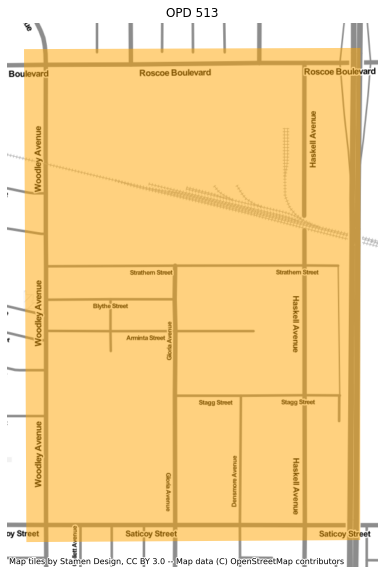

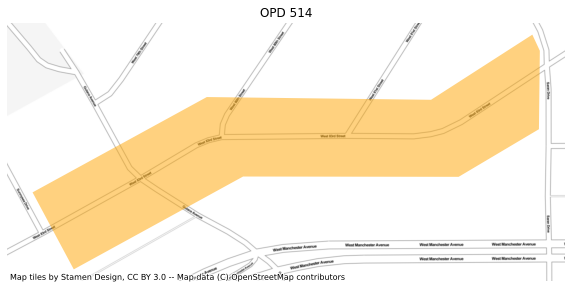

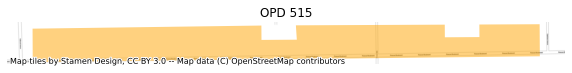

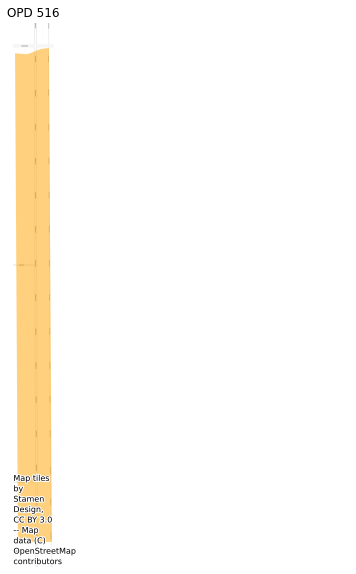

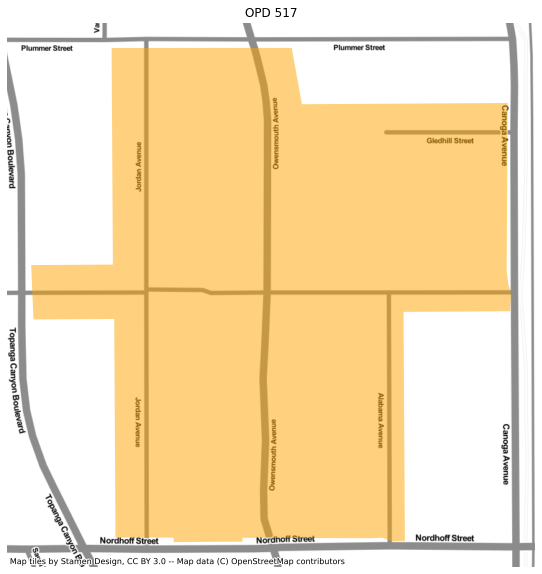

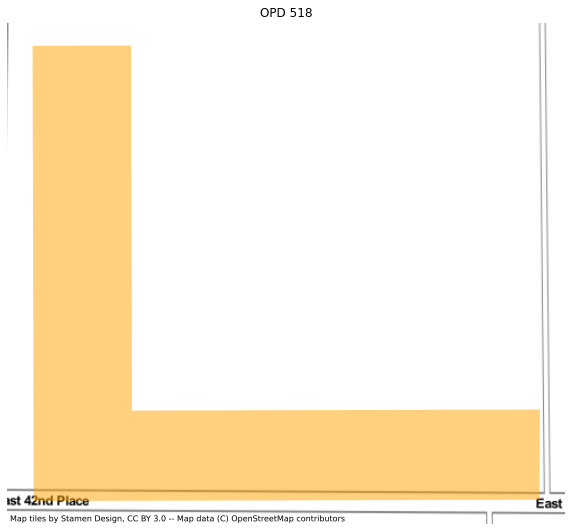

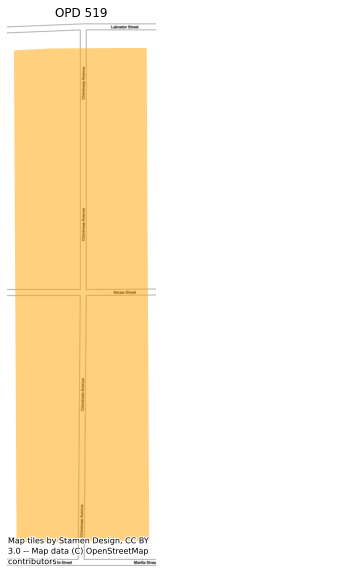

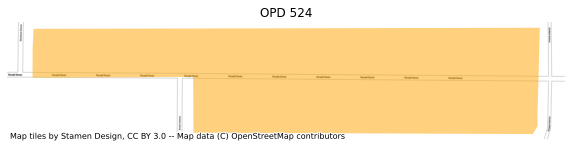

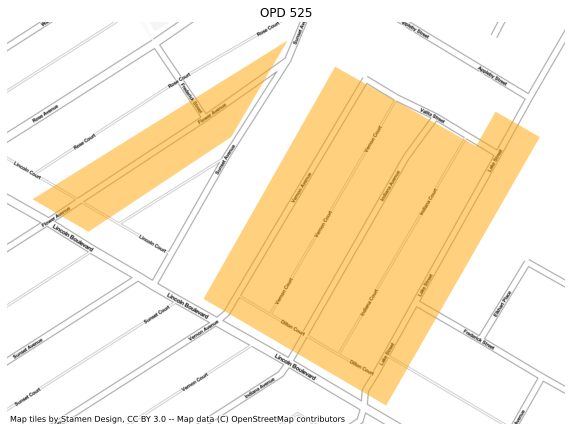

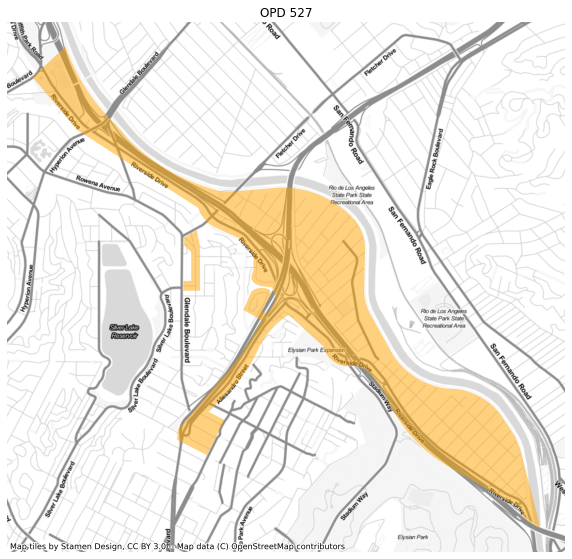

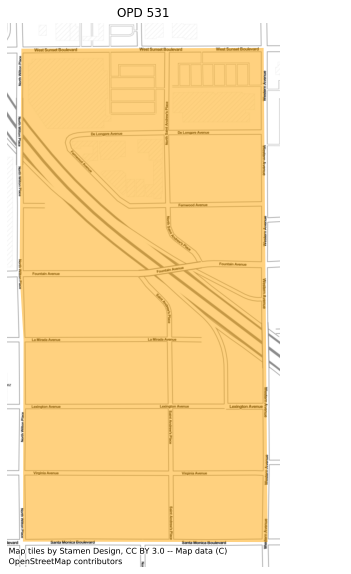

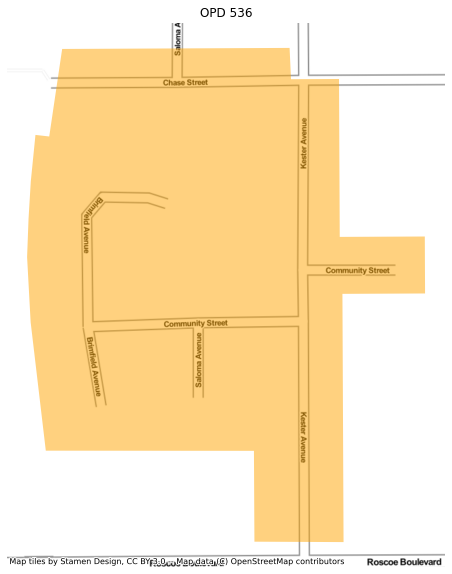

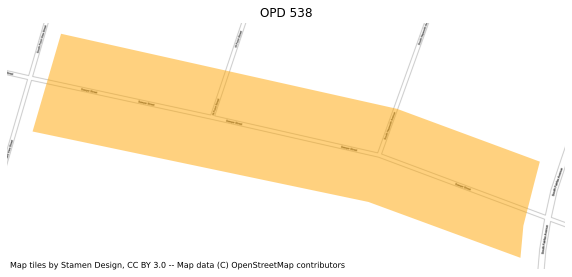

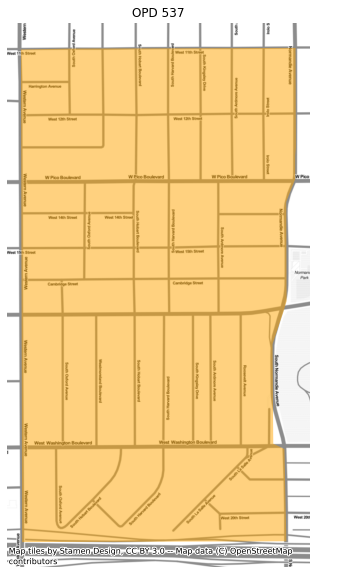

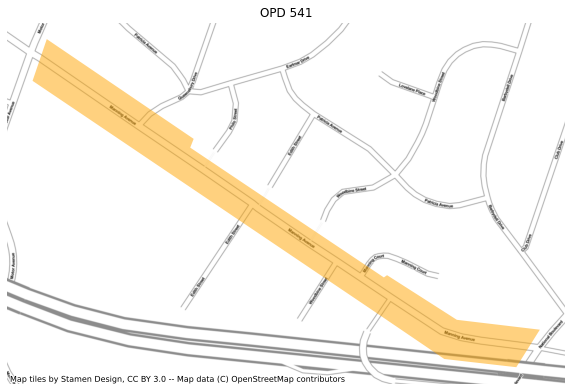

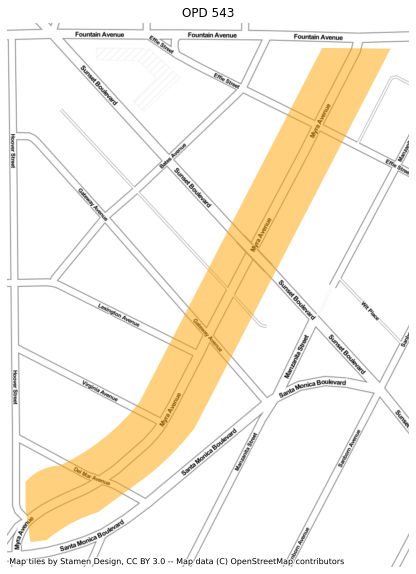

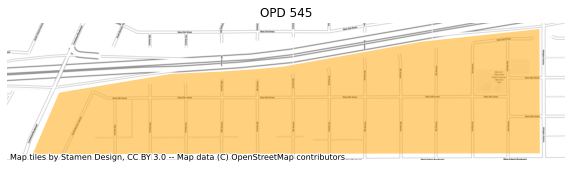

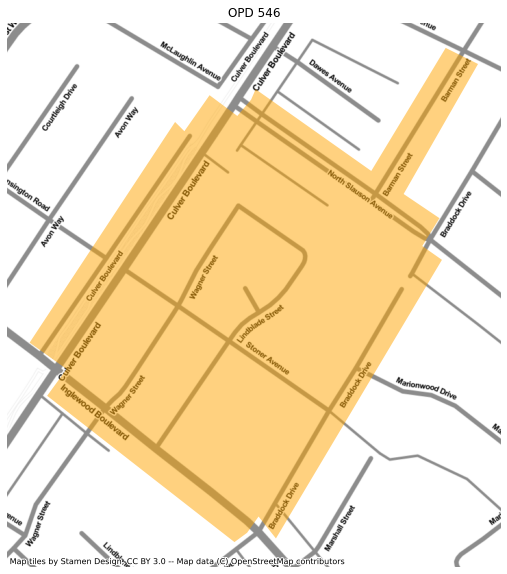

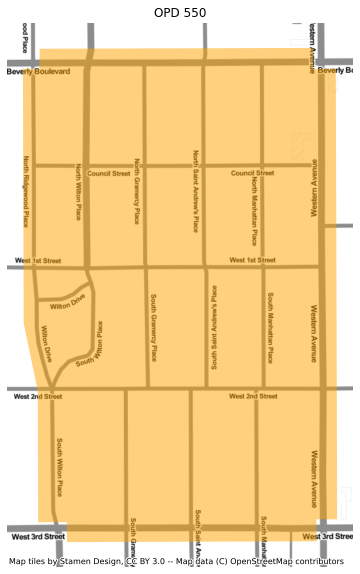

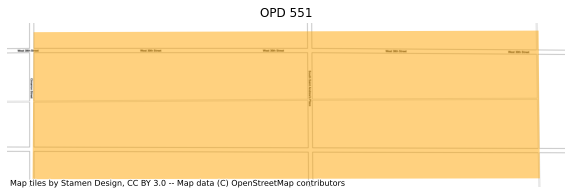

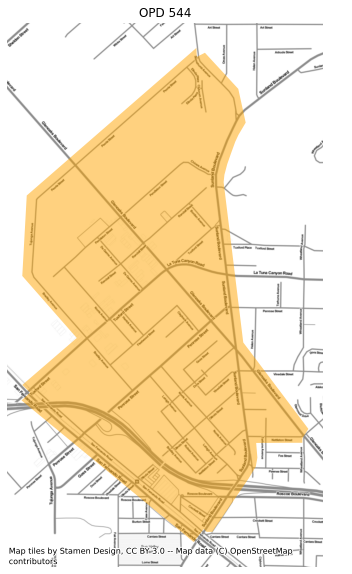

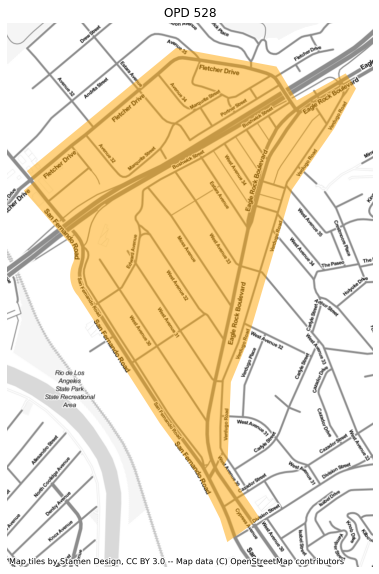

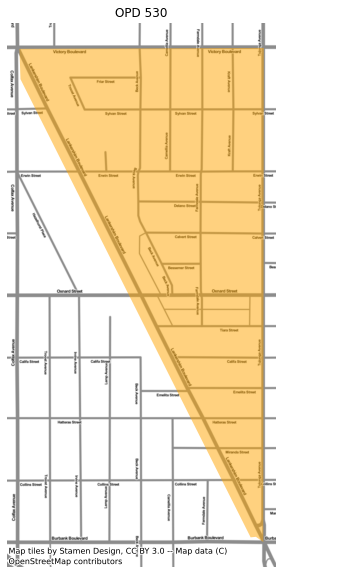

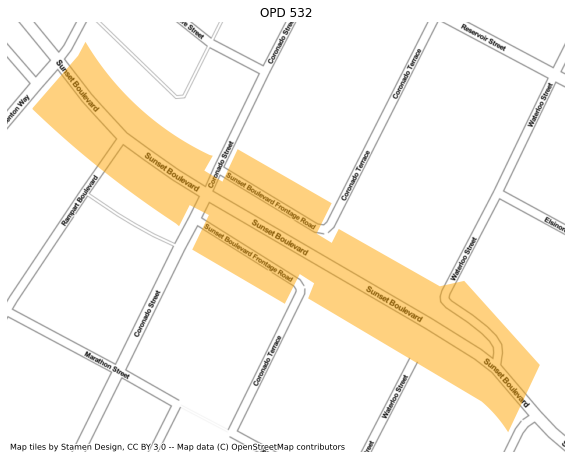

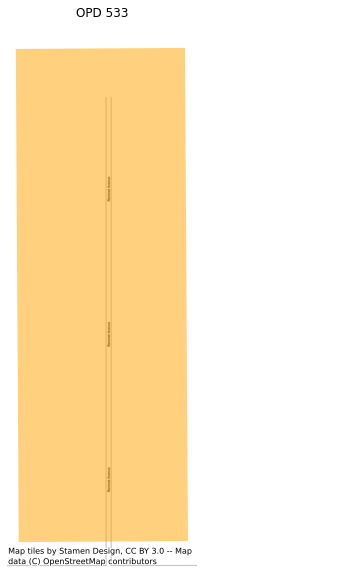

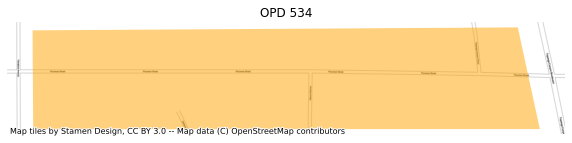

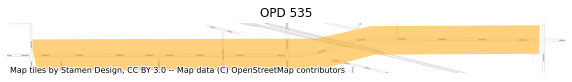

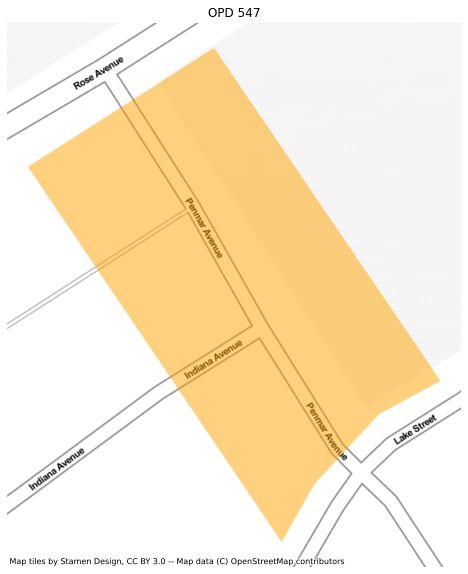

In [78]:
for number in number_list:
    map_opd1(number)

Well, it worked! (After a lot of trial and error that I have removed—you're welcome!) Not all of these maps are pretty, but it did crank out 40 maps in about two minutes, and beggers can't be choosers. I may try to play with the code, namely scale and zoom, to deal with a few of these funky maps, i.e. those covering a single block face that are producing useless output.

## Conclusion and Next Steps

We now have a decent sense of how housing affordability, vehicular homelessness, and parking districts interact. Affluent residential areas, principally in West Los Angeles and southern portions of the Valley, have little vehicular homelessness and strict parking regulation via PPDs. Vehicular homelessness thus concentrates in and around Downtown, near Venice, and industrial portions of North Hollywood and South Los Angeles, where it is increasingly being hemmed in by OPDs.

In the second half of the quarter, I would like to test these relationships for statistical significance.

*11/9/2021 Update: Next, I will undertake a spatial autocorrelation of vehicular homeless, both in total and by type.*